Definition and Imports

In [1]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

NN Layers Definition

In [2]:
# Define a function to create a model with a variable number of neurons in the hidden layer
def create_model(n_hidden_neurons):
    class VariableNN(nn.Module):
        def __init__(self, n_hidden_neurons):
            super(VariableNN, self).__init__()
            self.fc1 = nn.Linear(2, n_hidden_neurons)  # Input to hidden layer
            self.fc2 = nn.Linear(n_hidden_neurons, 1)  # Hidden to output layer

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = torch.sigmoid(self.fc2(x))
            return x
    return VariableNN(n_hidden_neurons)

Train **[FIRST]** and evaluate the model

Test with data size: 10
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Real World Accuracy: 50.00%
Approximated Bias: 0.00%, Approximated Variance: 0.00%, Approximated Variance (vs Real World_vs_rw): 50.00%




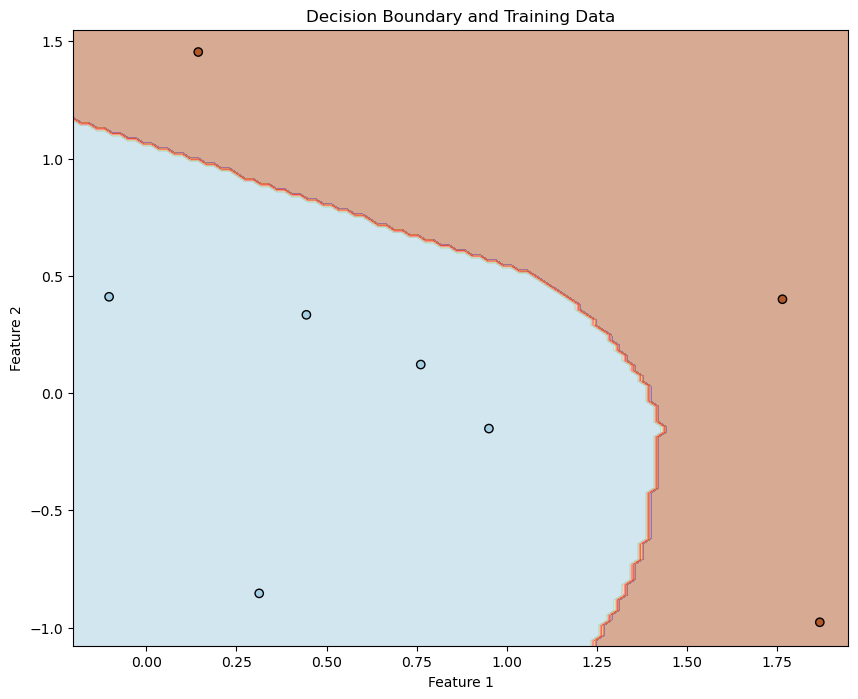

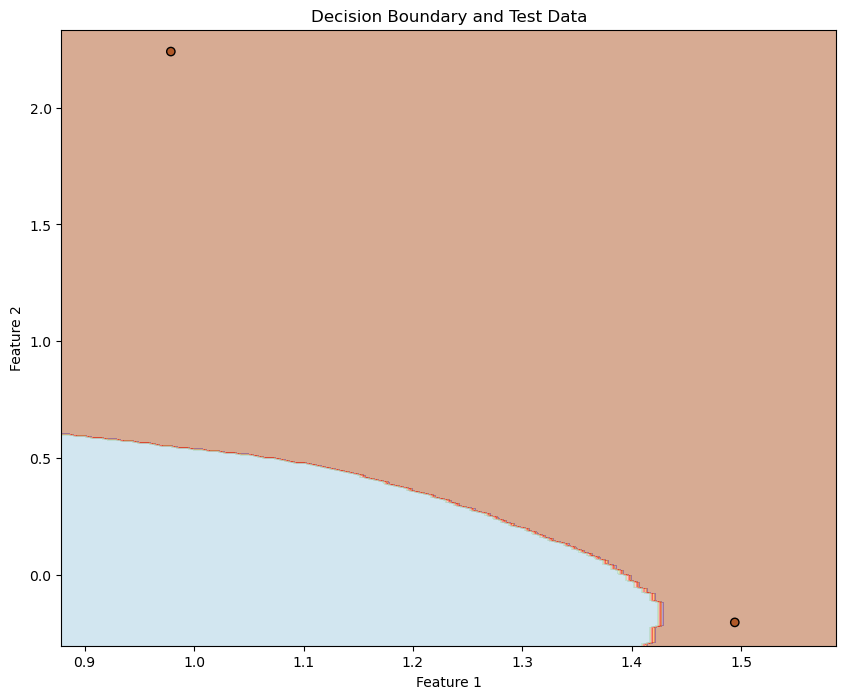

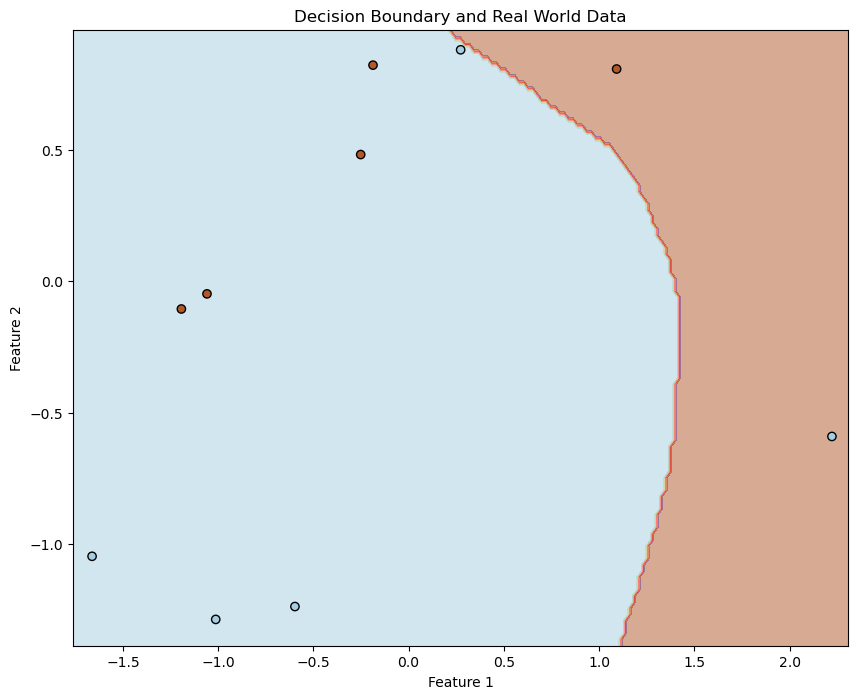

Test with data size: 50
Training Accuracy: 100.00%
Test Accuracy: 90.00%
Real World Accuracy: 54.00%
Approximated Bias: 10.00%, Approximated Variance: 10.00%, Approximated Variance (vs Real World_vs_rw): 46.00%




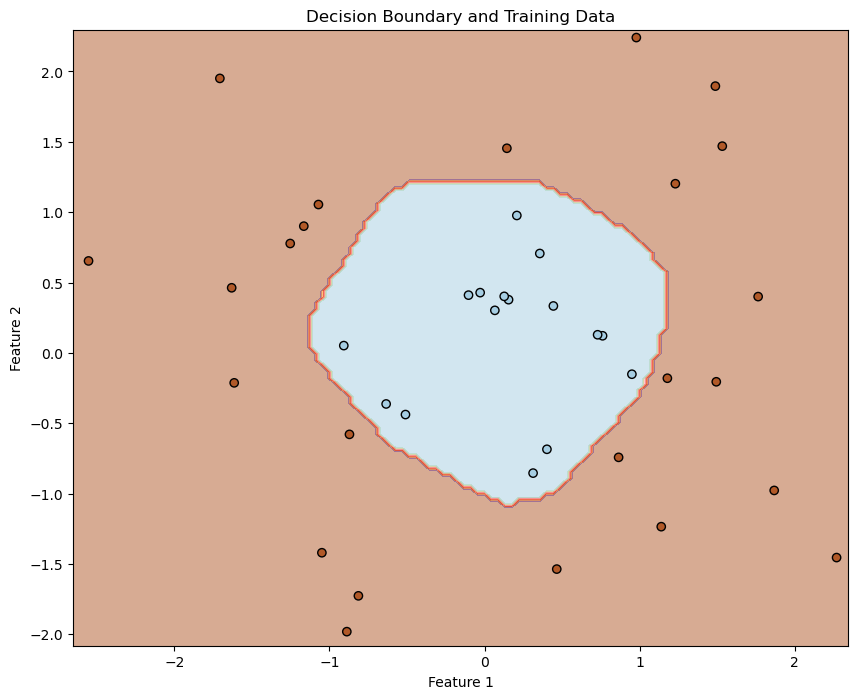

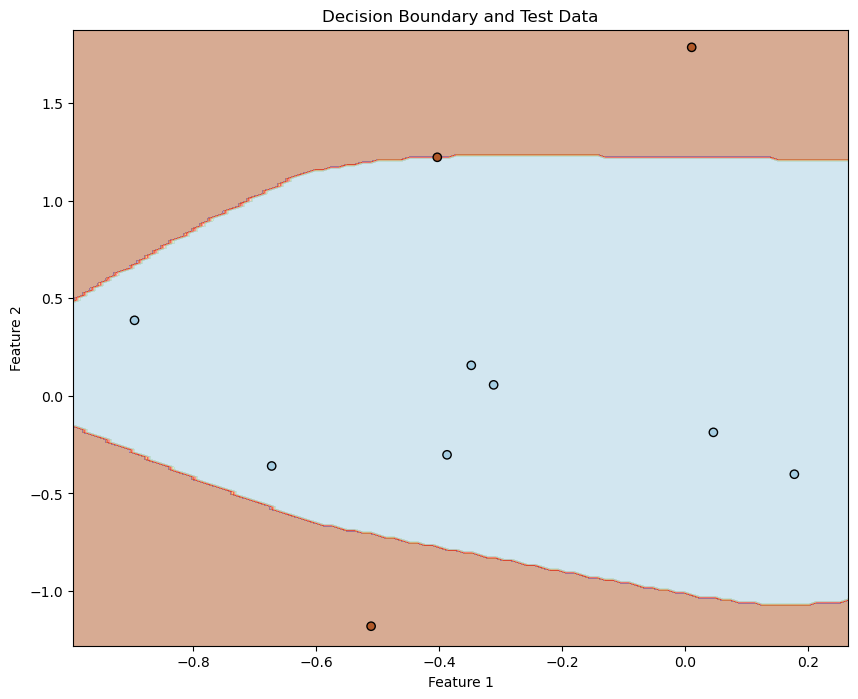

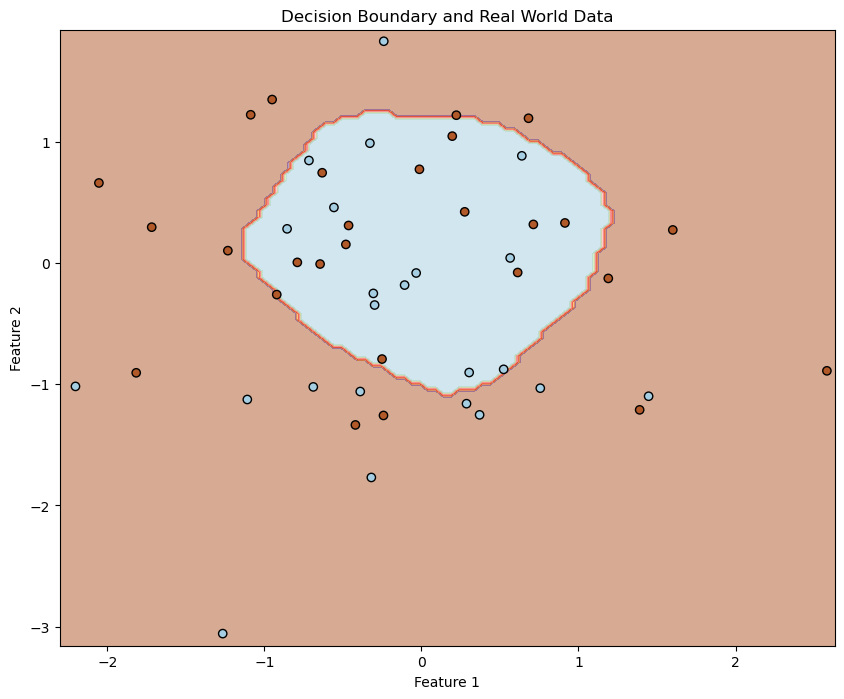

Test with data size: 100
Training Accuracy: 100.00%
Test Accuracy: 95.00%
Real World Accuracy: 63.00%
Approximated Bias: 5.00%, Approximated Variance: 5.00%, Approximated Variance (vs Real World_vs_rw): 37.00%




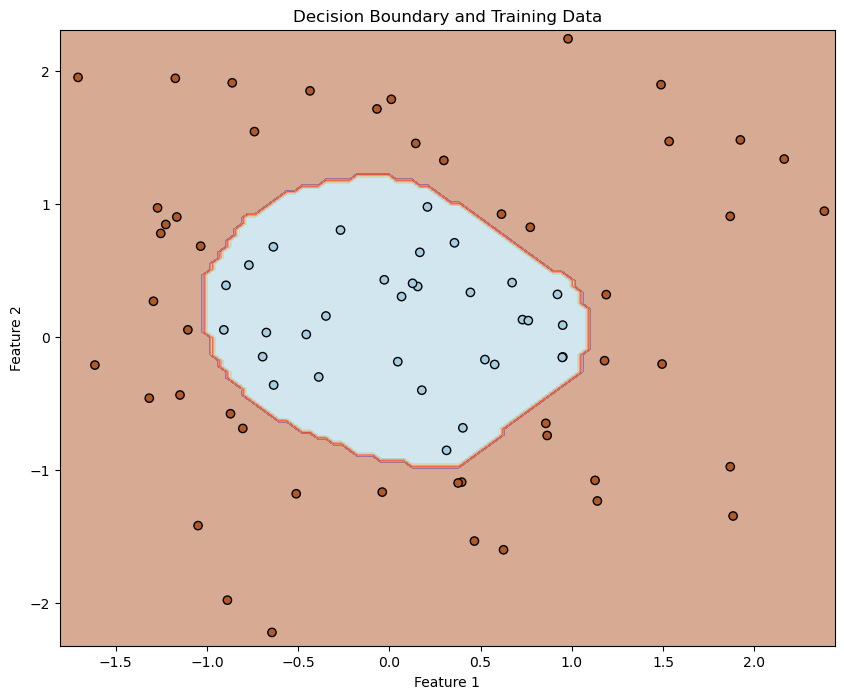

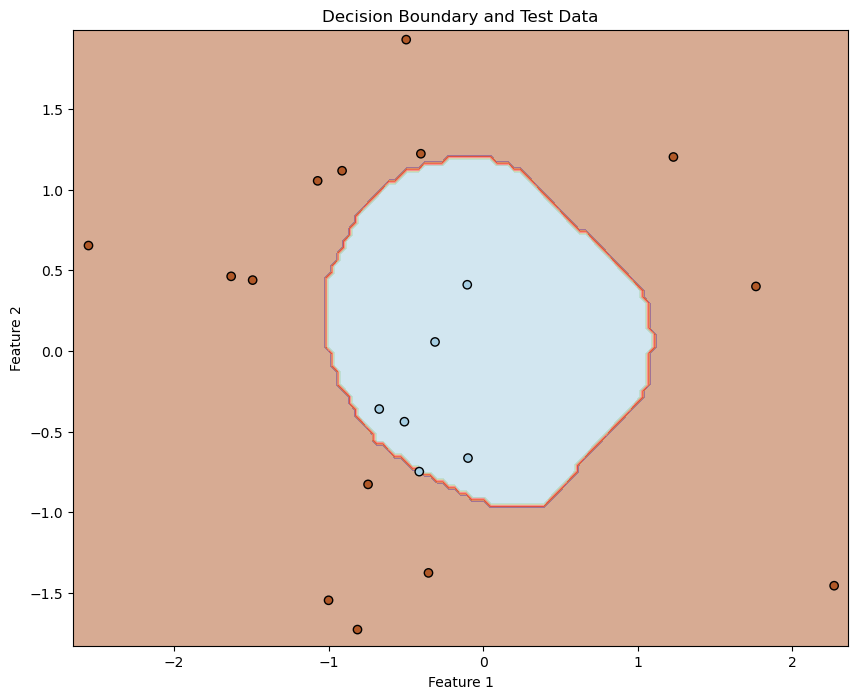

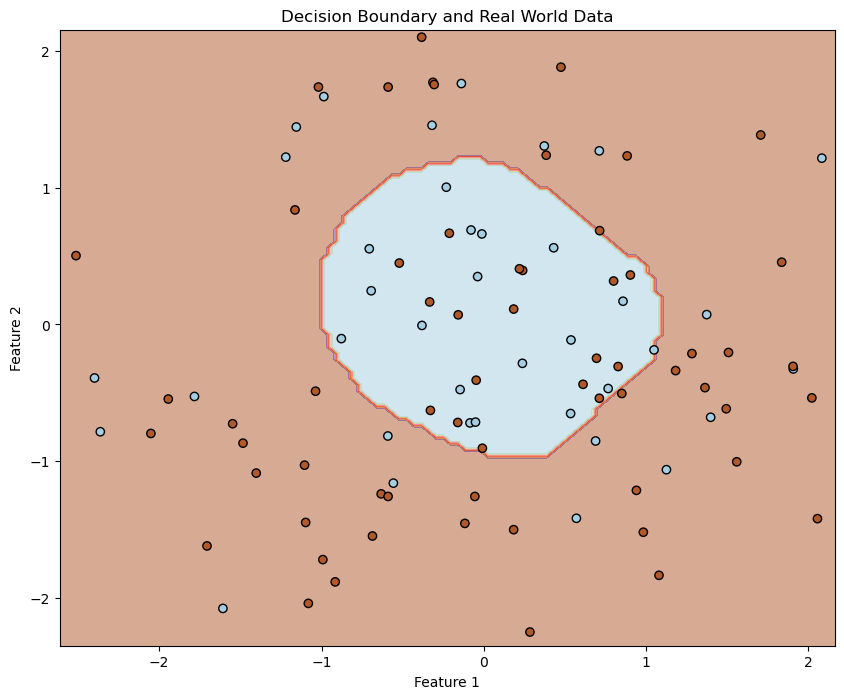

Test with data size: 250
Training Accuracy: 100.00%
Test Accuracy: 96.00%
Real World Accuracy: 50.00%
Approximated Bias: 4.00%, Approximated Variance: 4.00%, Approximated Variance (vs Real World_vs_rw): 50.00%




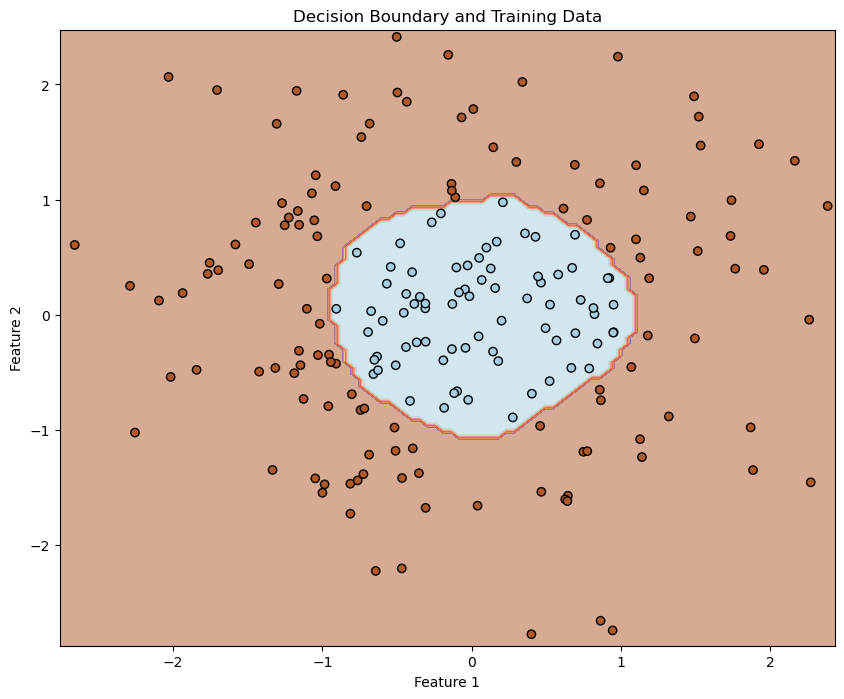

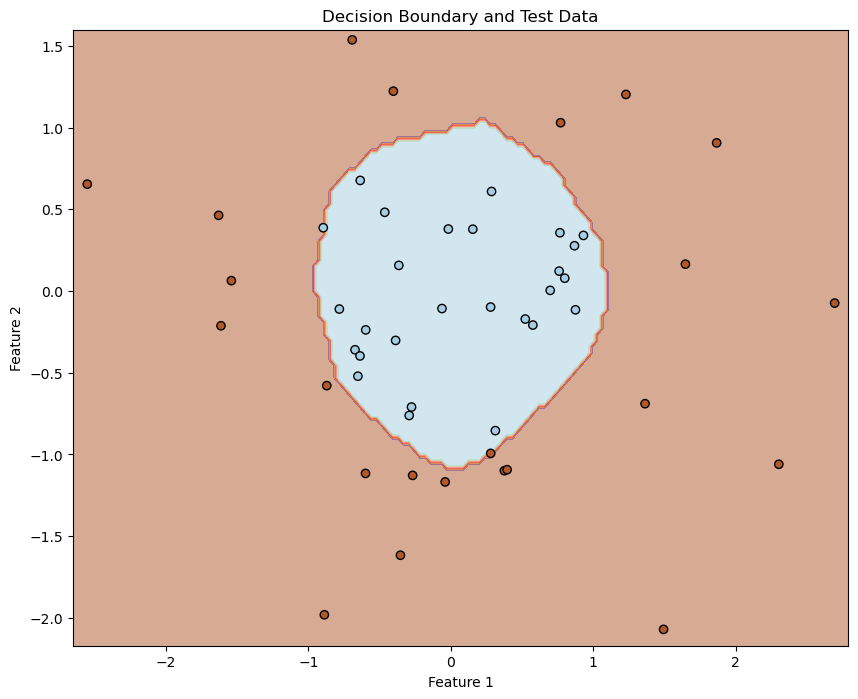

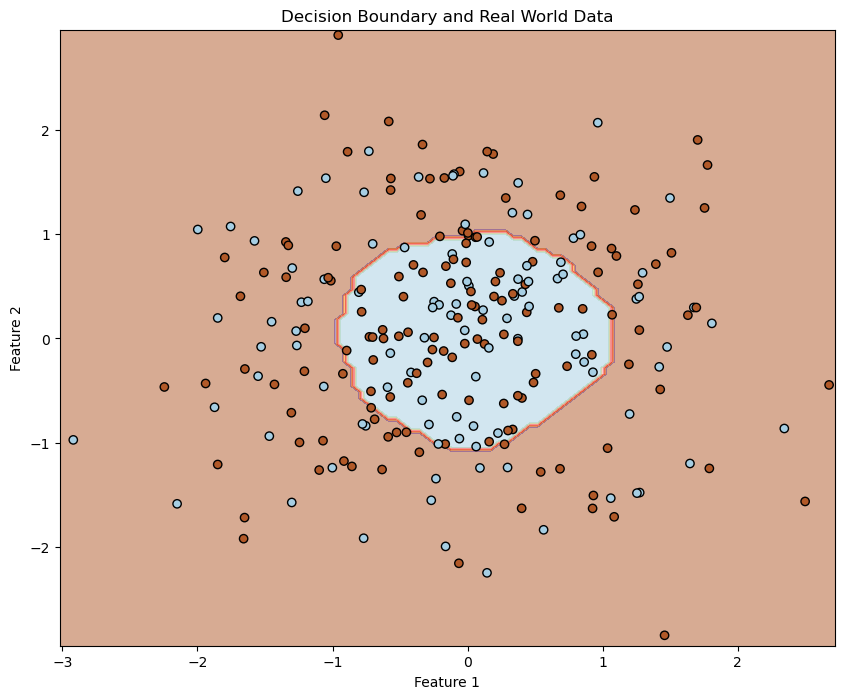

Test with data size: 500
Training Accuracy: 100.00%
Test Accuracy: 98.00%
Real World Accuracy: 54.40%
Approximated Bias: 2.00%, Approximated Variance: 2.00%, Approximated Variance (vs Real World_vs_rw): 45.60%




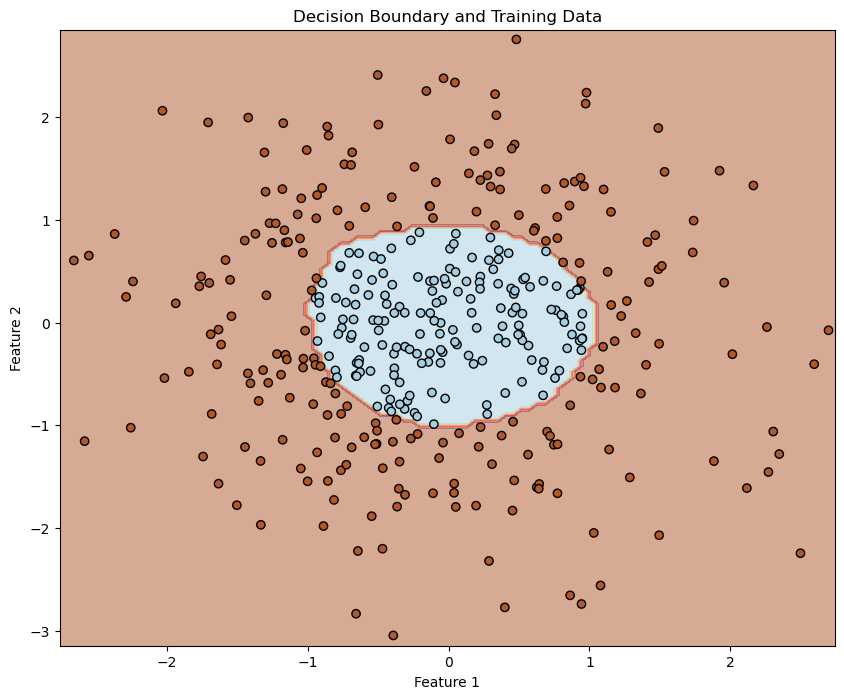

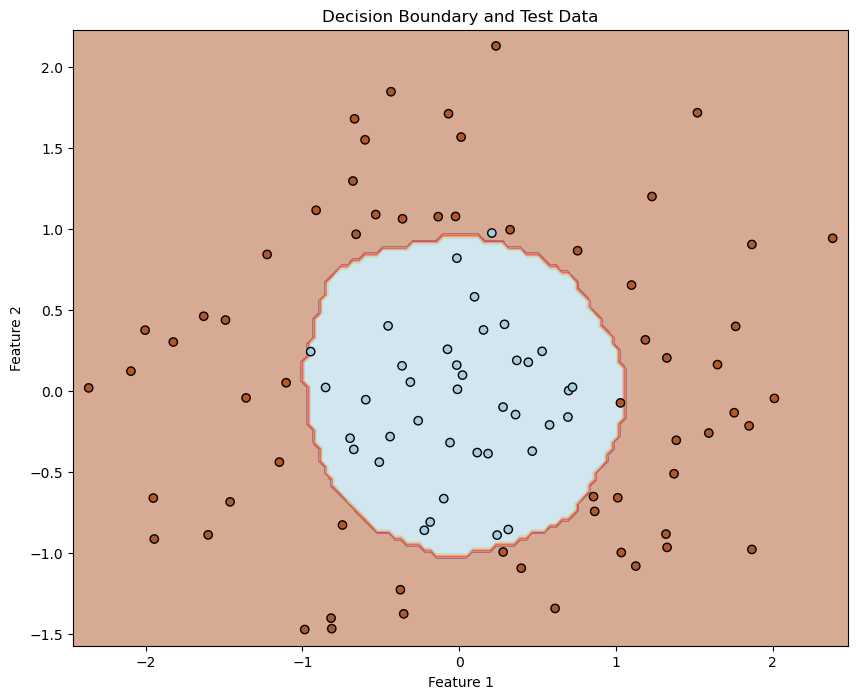

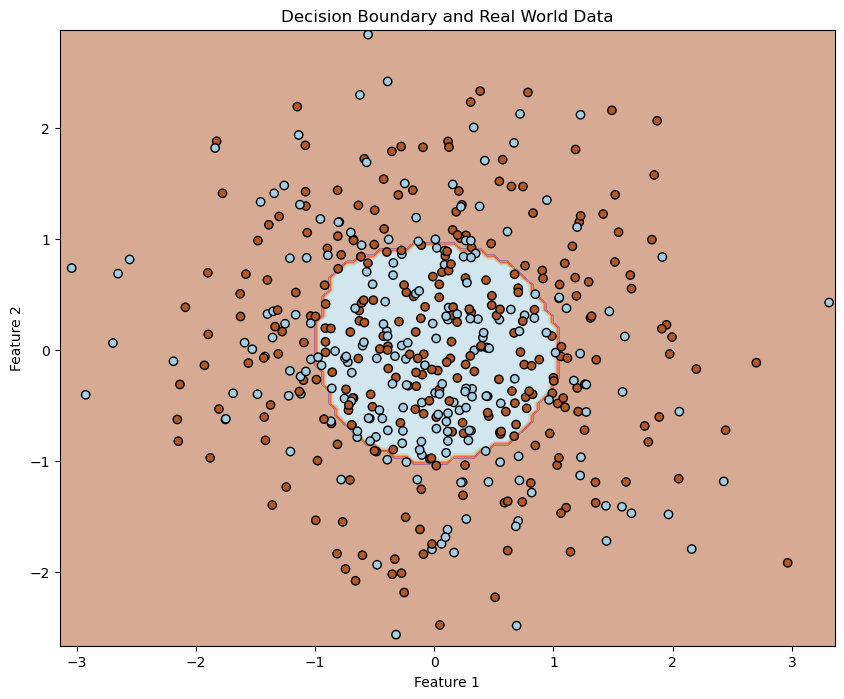

Test with data size: 1000
Training Accuracy: 100.00%
Test Accuracy: 99.00%
Real World Accuracy: 49.30%
Approximated Bias: 1.00%, Approximated Variance: 1.00%, Approximated Variance (vs Real World_vs_rw): 50.70%




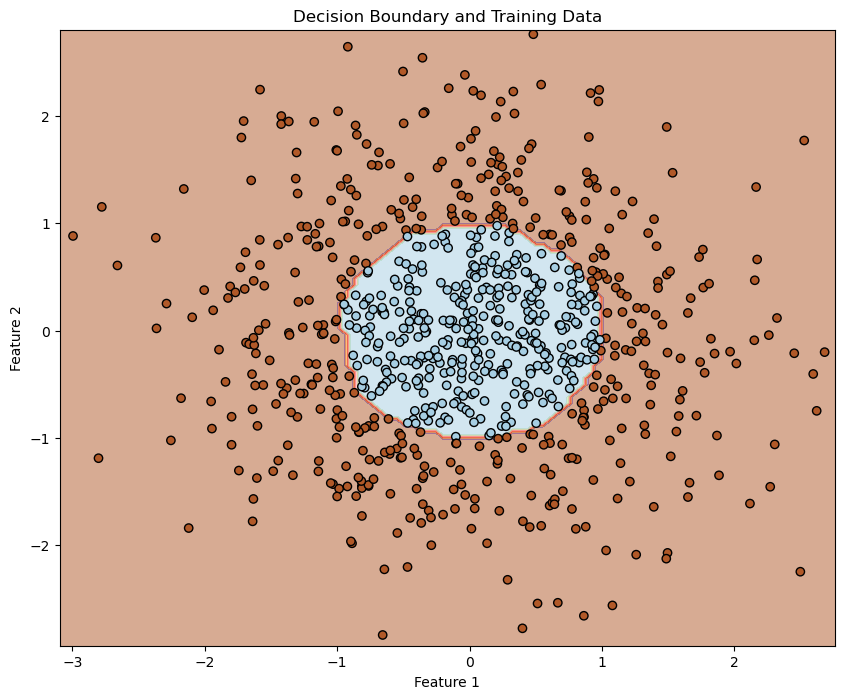

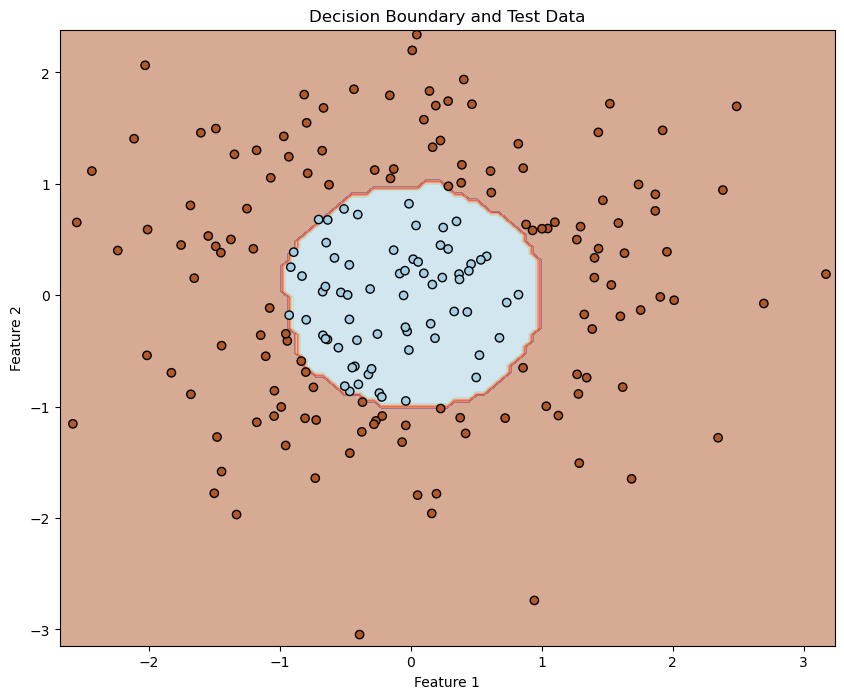

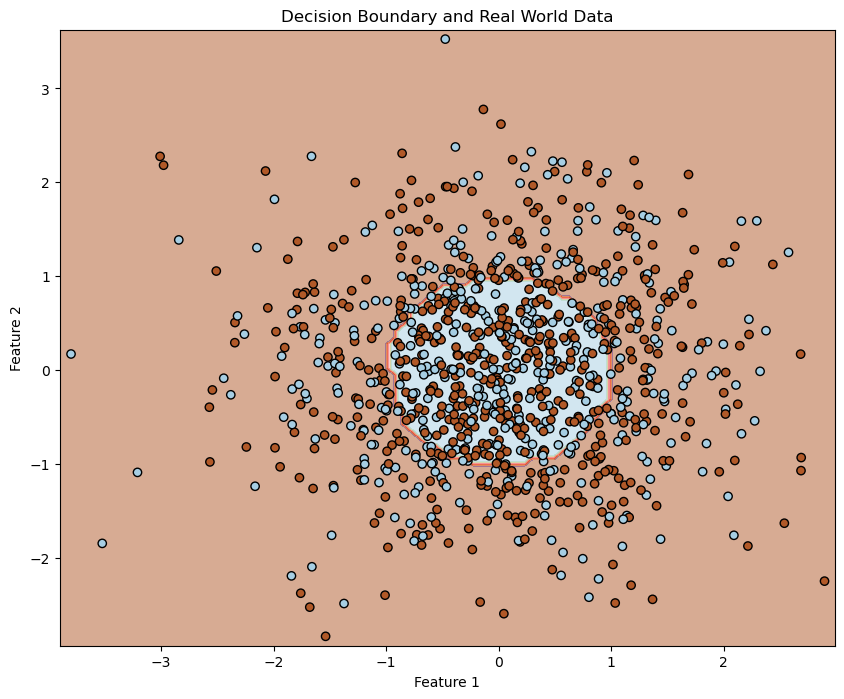

Test with data size: 2000
Training Accuracy: 100.00%
Test Accuracy: 99.75%
Real World Accuracy: 53.35%
Approximated Bias: 0.25%, Approximated Variance: 0.25%, Approximated Variance (vs Real World_vs_rw): 46.65%




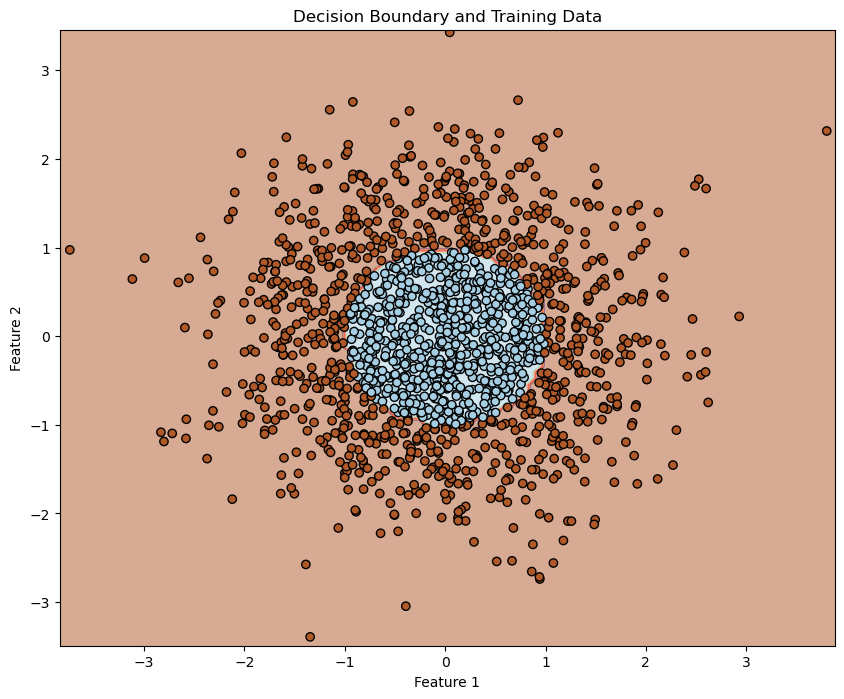

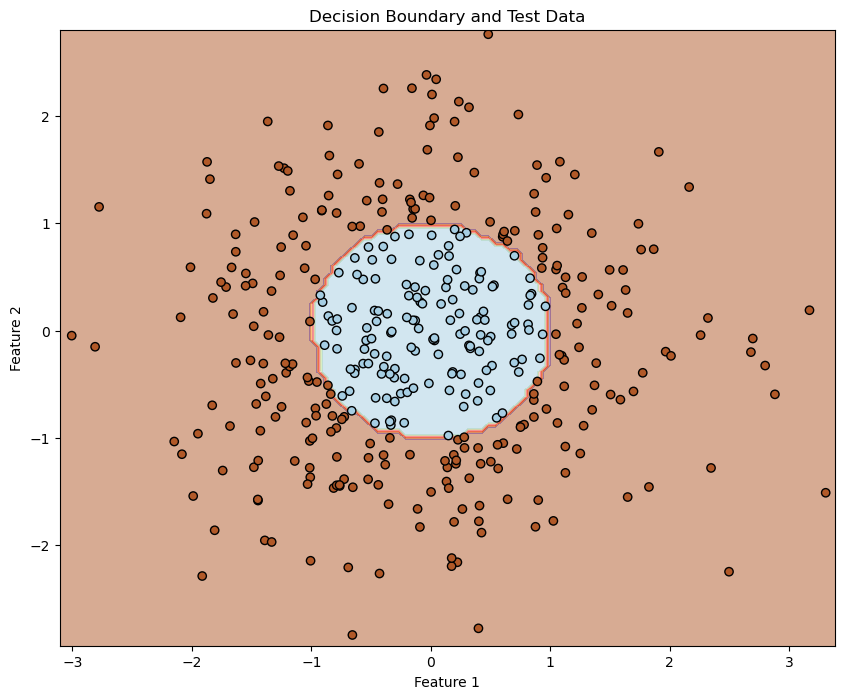

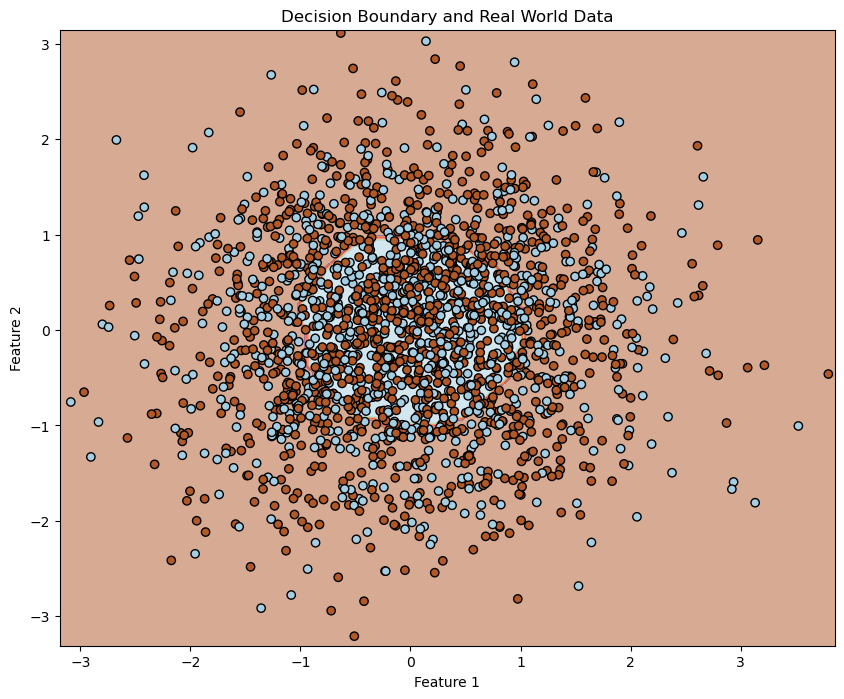

Test with data size: 10000
Training Accuracy: 99.88%
Test Accuracy: 99.65%
Real World Accuracy: 52.60%
Approximated Bias: 0.35%, Approximated Variance: 0.22%, Approximated Variance (vs Real World_vs_rw): 47.27%




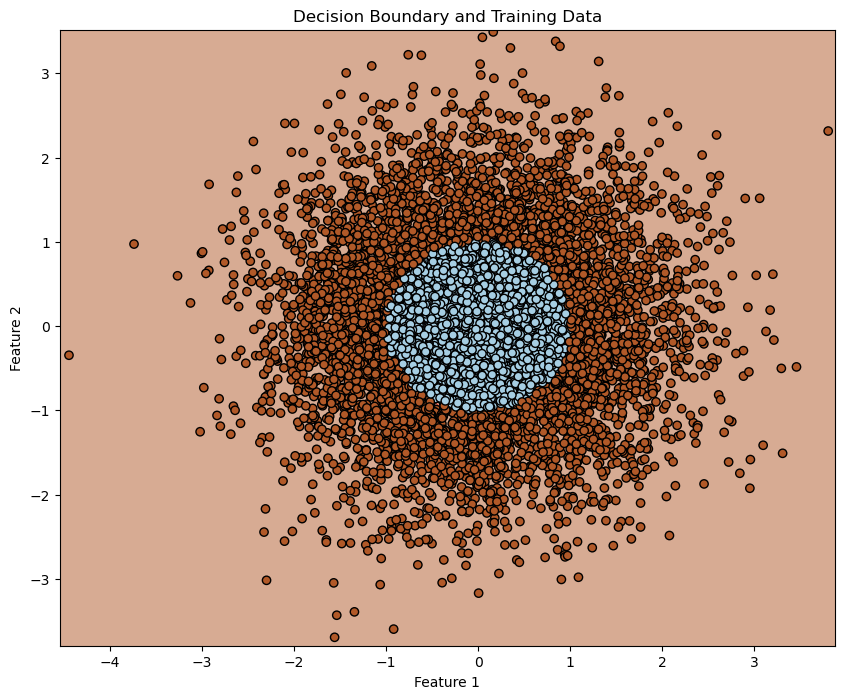

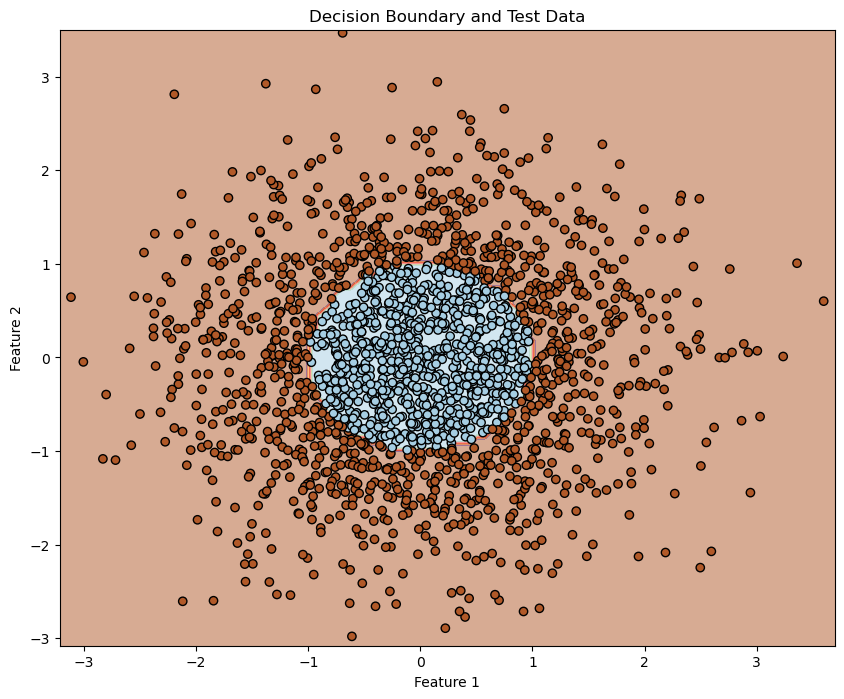

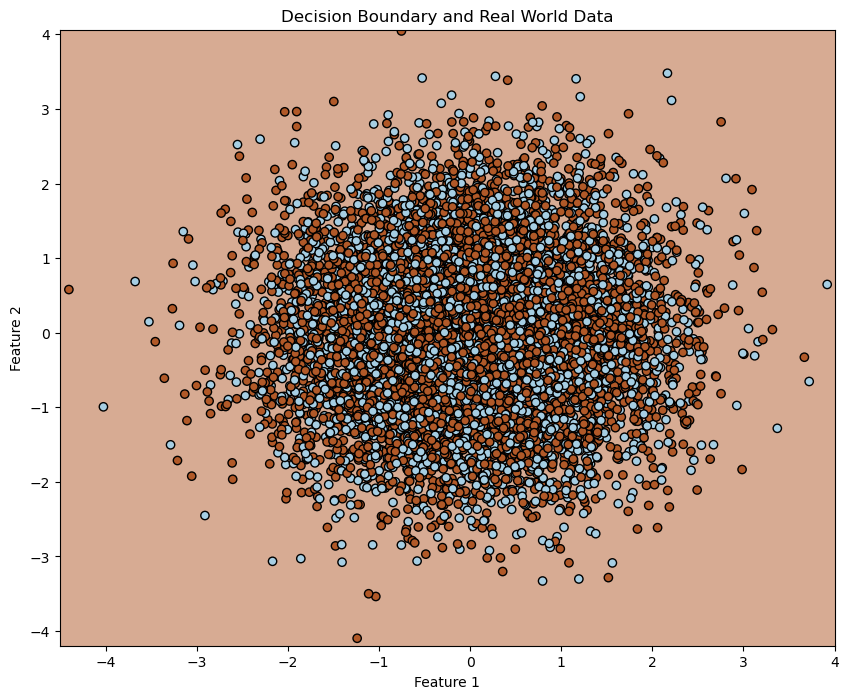

Test with data size: 50000
Training Accuracy: 99.90%
Test Accuracy: 99.91%
Real World Accuracy: 52.16%
Approximated Bias: 0.09%, Approximated Variance: 0.01%, Approximated Variance (vs Real World_vs_rw): 47.74%




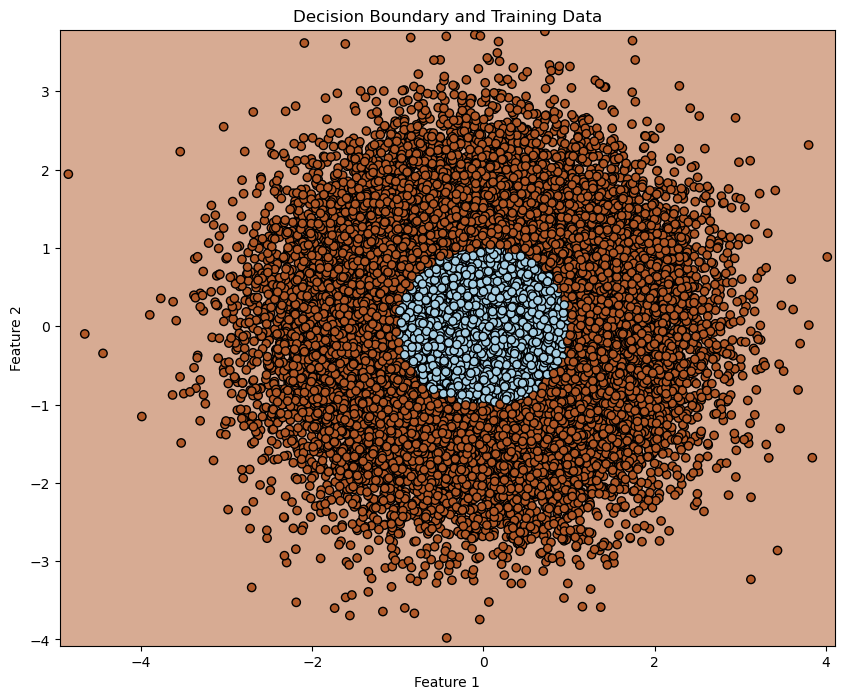

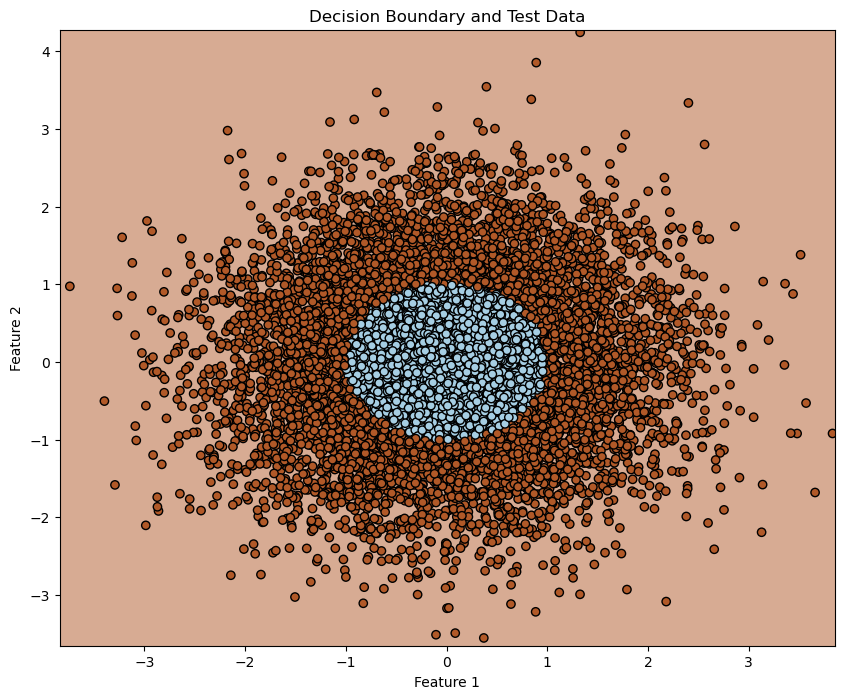

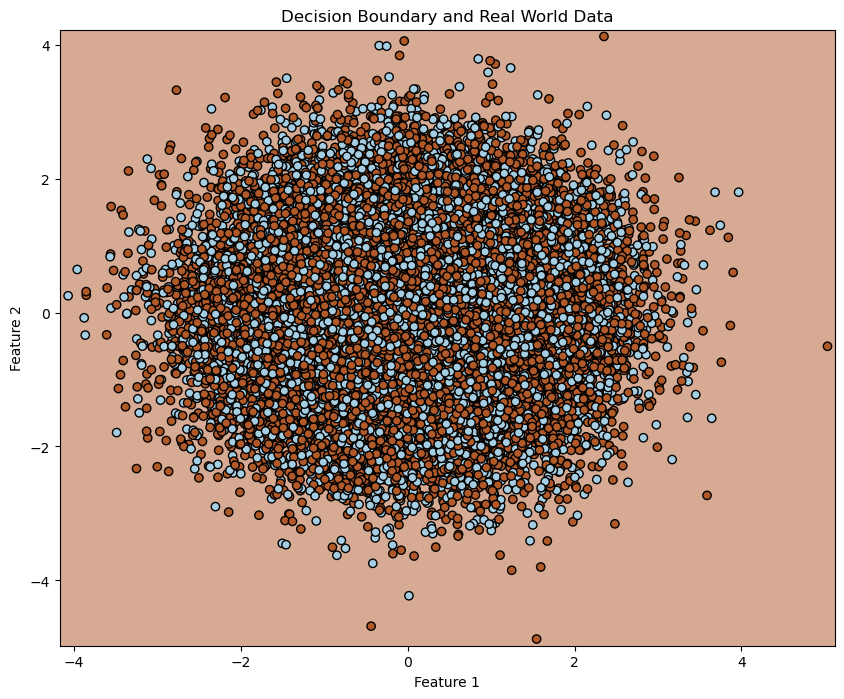

Test with data size: 100000
Training Accuracy: 99.91%
Test Accuracy: 99.87%
Real World Accuracy: 52.25%
Approximated Bias: 0.13%, Approximated Variance: 0.04%, Approximated Variance (vs Real World_vs_rw): 47.67%




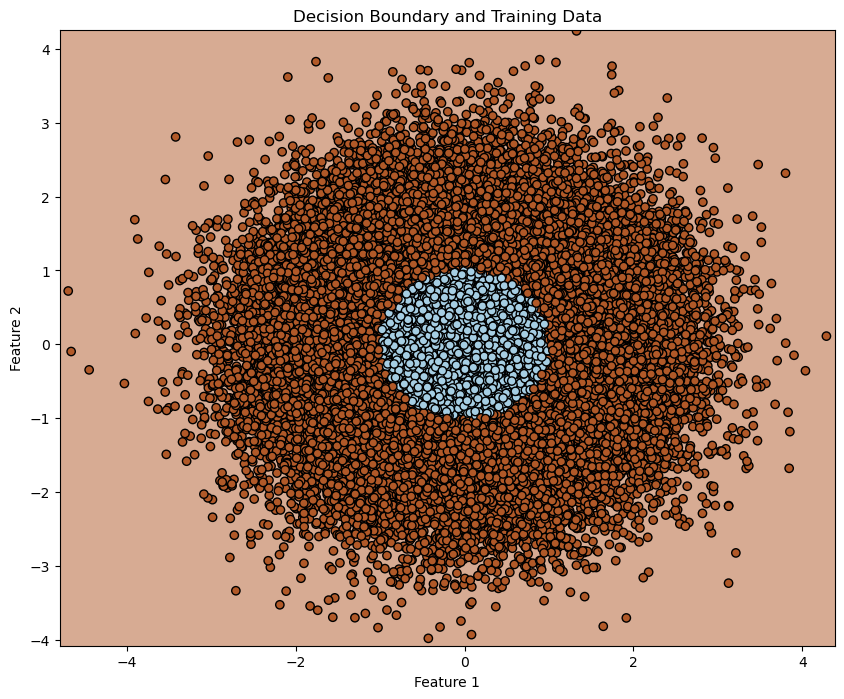

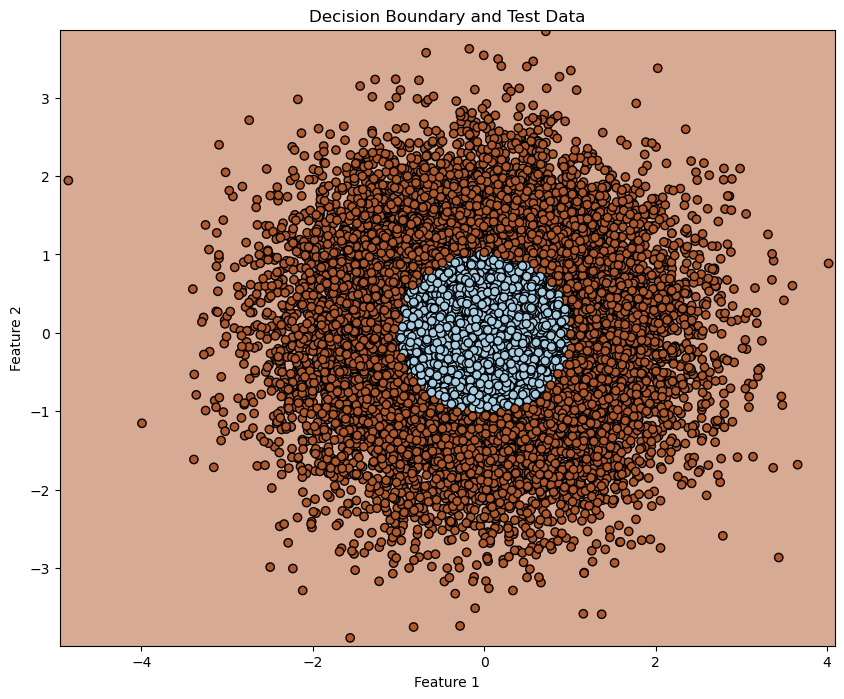

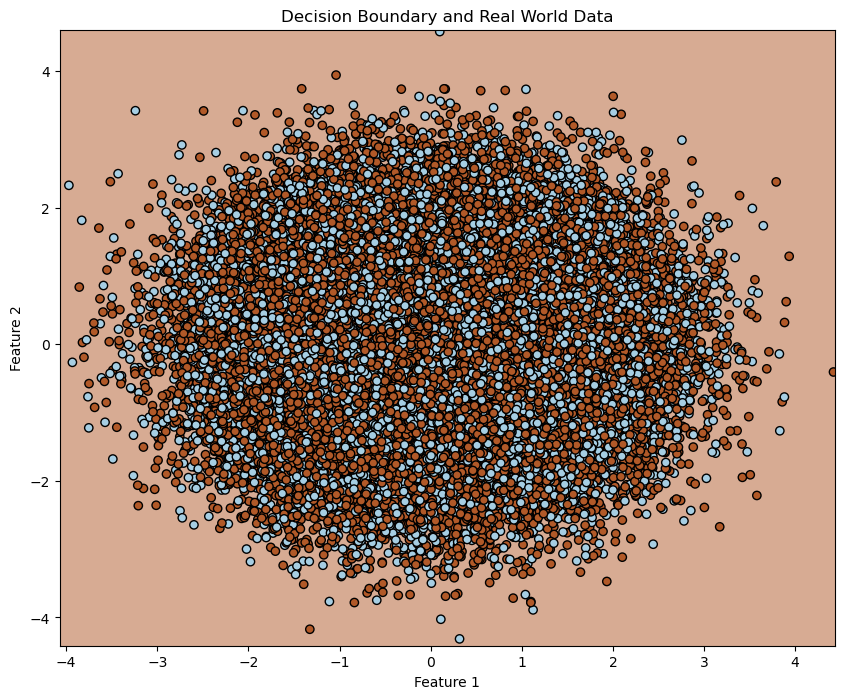

In [3]:
# Train and evaluate models with different complexities
#data_size_range = [10, 50, 100, 250, 500, 1000, 2000, 10000, 50000, 100000, 1000000]  # Varying the size of the data
data_size_range = [10, 50, 100, 250, 500, 1000, 2000, 10000, 50000, 100000]  # Varying the size of the data
train_errors = []
test_errors = []
rw_errors = []

for sampledatasize in data_size_range:

    # Set random seed for reproducibility
    torch.manual_seed(0)
    np.random.seed(0)


    # Generate dataset
    samples = sampledatasize  # Increased number of samples for better training and testing split
    X = np.random.randn(samples, 2)  # Random points in 2D
    y = np.array([1 if np.linalg.norm(x) < 1 else 0 for x in X], dtype=np.float32)  # 1 if inside the unit circle, 0 otherwise

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Convert to PyTorch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape for compatibility
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


    # "Real word" Data generation
    torch.manual_seed(0)
    np.random.seed()
    #np.random.seed(0)


    # Generate dataset
    realSamples = sampledatasize  # size of the "real" data
    realX = np.random.randn(realSamples, 2)  # Random points in 2D
    realY = np.array([1 if np.linalg.norm(x) < 1 else 0 for x in X], dtype=np.float32)  # 1 if inside the unit circle, 0 otherwise

    # Convert to PyTorch tensors
    realX = torch.tensor(realX, dtype=torch.float32)
    realY = torch.tensor(realY, dtype=torch.float32).view(-1, 1)  # Reshape for compatibility


    model = create_model(64)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.BCELoss()

    # Train the model
    for epoch in range(1000):  # Using a fixed number of epochs for simplicity
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    # After training, evaluate the model on both training and test sets
    with torch.no_grad():
        outputs_train = model(X_train)
        predicted_train = (outputs_train > 0.5).float()
        accuracy_train = (predicted_train == y_train).sum().item() / y_train.size(0)

        outputs_test = model(X_test)
        predicted_test = (outputs_test > 0.5).float()
        accuracy_test = (predicted_test == y_test).sum().item() / y_test.size(0)

        outputs_rw = model(realX)
        predicted_rw = (outputs_rw > 0.5).float()
        accuracy_rw = (predicted_rw == realY).sum().item() / realY.size(0)

        print(f'\033[1mTest with data size: {sampledatasize}\033[0m')
        print(f'Training Accuracy: {accuracy_train:.2%}')
        print(f'Test Accuracy: {accuracy_test:.2%}')
        print(f'Real World Accuracy: {accuracy_rw:.2%}')

        # Calculate Bias and Variance (Approximation)
        # Here, bias is approximated as 1 - accuracy (error rate), and the difference in accuracy
        # between training and test sets is used as a proxy for variance.
        bias = 1 - accuracy_test
        variance = abs(accuracy_train - accuracy_test)
        variance_vs_rw = abs(accuracy_train - accuracy_rw)
        print(f'Approximated Bias: {bias:.2%}, Approximated Variance: {variance:.2%}, Approximated Variance (vs Real World_vs_rw): {variance_vs_rw:.2%}\n\n')

    # Evaluate the model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Training error
        output_train = model(X_train)
        loss_train = criterion(output_train, y_train)
        train_errors.append(loss_train.item())

        # Test error
        output_test = model(X_test)
        loss_test = criterion(output_test, y_test)
        test_errors.append(loss_test.item())

        # Real World
        output_rw = model(realX)
        loss_rw = criterion(output_rw, realY)
        rw_errors.append(loss_rw.item())


    def plot_decision_boundary(X, y, model,type_of_data):
    # Set min and max values and give it some padding
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        spacing = min(x_max - x_min, y_max - y_min) / 100

        # Generate a grid of points with distance 'spacing' between them
        XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                         np.arange(y_min, y_max, spacing))

        # Flatten the grid to pass into model
        data = np.hstack((XX.ravel().reshape(-1,1),
                      YY.ravel().reshape(-1,1)))

        # Predict binary class (0 or 1) for each datapoint in the grid
        db_data = torch.tensor(data, dtype=torch.float32)
        with torch.no_grad():
            Z = model(db_data)
        Z = (Z > 0.5).float()
        Z = Z.reshape(XX.shape)

        plt.figure(figsize=(10,8))
        plt.contourf(XX, YY, Z, cmap='Paired_r', alpha=0.5)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired_r', edgecolors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary and ' + type_of_data + ' Data')
        plt.show()

    # Convert X_train and Y_train back to numpy arrays for plotting
    X_train_numpy = X_train.numpy()
    Y_train_numpy = y_train.numpy().reshape(-1)

    # Plot the decision boundary and training data
    plot_decision_boundary(X_train_numpy, Y_train_numpy, model, 'Training')

    # Convert X_test and Y_test back to numpy arrays for plotting
    X_test_numpy = X_test.numpy()
    Y_test_numpy = y_test.numpy().reshape(-1)

    # Plot the decision boundary and training data
    plot_decision_boundary(X_test_numpy, Y_test_numpy, model, 'Test')

    # Convert X_real world and Y_real world back to numpy arrays for plotting
    X_rw_numpy = realX.numpy()
    Y_rw_numpy = realY.numpy().reshape(-1)

    # Plot the decision boundary and training data
    plot_decision_boundary(X_rw_numpy, Y_rw_numpy, model, 'Real World')



Plotting **model error vs. model complexity**

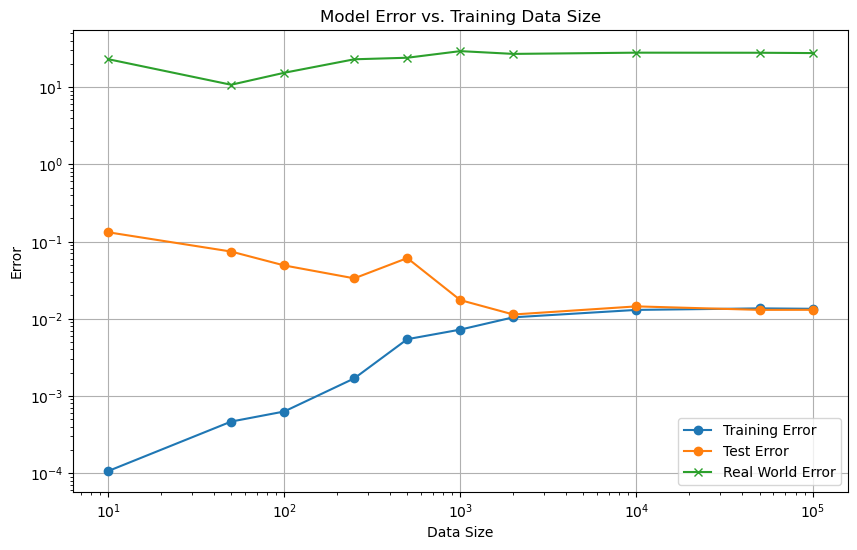

In [4]:
# Plotting model error vs. model complexity
plt.figure(figsize=(10, 6))
plt.plot(data_size_range, train_errors, label='Training Error', marker='o')
plt.plot(data_size_range, test_errors, label='Test Error', marker='o')
plt.plot(data_size_range, rw_errors, label='Real World Error', marker='x')
plt.xlabel('Data Size')
plt.ylabel('Error')
plt.title('Model Error vs. Training Data Size')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()